In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [2]:
data_dir = 'Trace_files'
fnames = [x for x in filter(lambda x: x.endswith('.txt'), os.listdir(os.path.join('.', data_dir)))]
workload_names = [ x for x in map(lambda x: x.split('_')[1].split('.')[0], fnames) ]

In [3]:
# a dict of dataframes, tread (index) lightly..
dataset = {fname.split('_')[1].split('.')[0]:pd.read_csv(os.path.join(data_dir, fname), delimiter='\s+', header = None, dtype = float) for fname in fnames for fname in fnames}

In [4]:
request_sizes = { workname:dataset[workname].iloc[:,2] for workname in workload_names }
for cindx in 4, 5, 6, 7:
    for df in dataset.values():
        df.loc[:,cindx] = df.loc[:,cindx].apply(datetime.fromtimestamp)

In [5]:
turnaround_time = {}
hw_time = {}
for name in workload_names:
    turnaround_time[name] = dataset[name].iloc[:,7] - dataset[name].iloc[:,4]
    turnaround_time[name] = turnaround_time[name].apply(lambda x: x.components.milliseconds*1000+x.components.microseconds)
    hw_time[name] = dataset[name].iloc[:,7] - dataset[name].iloc[:,6]
    hw_time[name] = hw_time[name].apply(lambda x: x.components.milliseconds*1000+x.components.microseconds)

In [6]:
avg_req_size_stdev = {x:np.std(request_sizes[x]) for x in workload_names}
avg_req_size       = {x:np.mean(request_sizes[x]) for x in workload_names}

In [10]:
df = dataset['Movie']
df.head()

,0,1,2,3,4,5,6,7
0,8681184.0,88.0,45056.0,0.0,2014-04-25 11:03:19.646690,2014-04-25 11:03:19.652922,2014-04-25 11:03:19.653009,2014-04-25 11:03:19.653717
1,8681280.0,56.0,28672.0,0.0,2014-04-25 11:03:19.651066,2014-04-25 11:03:19.653123,2014-04-25 11:03:19.654584,2014-04-25 11:03:19.655161
2,8681344.0,56.0,28672.0,0.0,2014-04-25 11:03:19.651103,2014-04-25 11:03:19.654732,2014-04-25 11:03:19.655272,2014-04-25 11:03:19.655772
3,8681408.0,88.0,45056.0,0.0,2014-04-25 11:03:19.651144,2014-04-25 11:03:19.655384,2014-04-25 11:03:19.655805,2014-04-25 11:03:19.656554
4,8681504.0,16.0,8192.0,0.0,2014-04-25 11:03:19.651163,2014-04-25 11:03:19.655915,2014-04-25 11:03:19.656590,2014-04-25 11:03:19.656891


In [23]:
df.iloc[:,0].unique().shape[0] - df.iloc[:,0].shape[0]

-82

In [19]:
df.iloc[:,0] = df.iloc[:,0].map(int)

In [21]:
df.iloc[:,0].plot()

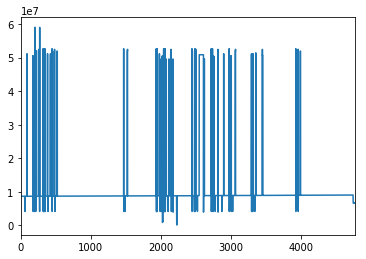

In [22]:
plt.show()